# Importing relevant libraries

In [231]:
import pandas as pd
import seaborn as sns
import tkinter as ttk
from tkinter import *
import matplotlib.pyplot as plt
from PIL import ImageTk,Image

### Importing the dataset

In [232]:
ds=pd.read_csv('players_22.csv')

C:\Users\rajat\AppData\Local\Temp\ipykernel_2020\3665914414.py:1: DtypeWarning: Columns (25,108) have mixed types. Specify dtype option on import or set low_memory=False.
  ds=pd.read_csv('players_22.csv')


### Removing unwanted columns

In [233]:
drop_cols=['sofifa_id', 'player_url', 'short_name', 'long_name', 'height_cm', 'weight_kg',
       'player_positions', 'overall', 'potential', 'value_eur', 'wage_eur','lcb', 'cb', 'rcb', 'rb', 'gk', 'player_face_url', 'club_logo_url',
       'club_flag_url', 'nation_logo_url', 'nation_flag_url','ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram',
       'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb',
       'lb','club_team_id', 'club_name',
       'league_name', 'league_level', 'club_position', 'club_jersey_number',
       'club_loaned_from', 'club_joined', 'club_contract_valid_until',
       'nationality_id', 'nationality_name', 'nation_team_id',
       'nation_position', 'nation_jersey_number', 'preferred_foot',
       'weak_foot', 'skill_moves', 'international_reputation', 'work_rate',
       'body_type', 'real_face', 'release_clause_eur', 'player_tags',
       'player_traits','attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy','shooting','goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking',
       'goalkeeping_positioning', 'goalkeeping_reflexes', 'goalkeeping_speed','dob','defending','mentality_interceptions','movement_reactions','movement_balance']

In [234]:
ds.drop(drop_cols,axis=1,inplace=True)
ds.dropna(inplace=True)

### Modifying the main DataFrame according to our needs

In [235]:
ds.astype(int)
sns.set(rc={'figure.figsize':(50,8)})

### Removing Outliers which may impact our analysis

In [236]:
ds = ds[ds['age'] <= 35]
ds = ds[ds['pace'] >= 50]
ds = ds[ds['passing'] >= 50]

### Grouping values on the basis of AGE(our target column)

In [237]:
q=ds.groupby('age').mean()
q['age'] = q.index                                  #adding AGE as a column too
q.astype(float)                                     #changing the datatype

,pace,passing,dribbling,physic,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,...,power_long_shots,mentality_aggression,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,age
age,,,,,,,,,,,,,,,,,,,,,
16,67.714286,55.142857,60.857143,52.142857,61.000000,39.571429,60.000000,49.571429,41.857143,56.857143,...,46.714286,54.857143,56.142857,53.000000,45.714286,51.142857,43.000000,50.000000,47.857143,16.0
17,68.443478,55.373913,61.173913,52.973913,60.643478,43.591304,60.843478,49.886957,43.208696,55.356522,...,45.095652,50.356522,51.747826,55.686957,48.826087,53.973913,42.304348,45.973913,44.686957,17.0
18,70.158960,56.372832,62.907514,54.017341,61.552023,44.904624,62.656069,50.763006,44.919075,55.716763,...,48.349711,50.459538,53.815029,55.962428,49.794798,55.647399,41.615607,45.164740,43.609827,18.0
19,70.164311,56.842756,62.727915,55.738516,62.335689,44.908127,62.173145,50.743816,44.436396,56.457597,...,49.159011,50.825088,54.038869,56.916961,49.558304,55.793286,43.001767,46.454064,44.321555,19.0
20,70.879739,57.673203,63.626144,58.273203,62.895425,44.890196,62.985621,51.405229,44.850980,57.128105,...,49.891503,53.267974,55.407843,57.211765,49.807843,57.197386,45.151634,48.737255,46.749020,20.0
21,71.423459,59.059642,64.759443,61.109344,64.520875,46.370775,63.980119,52.169980,45.867793,58.127237,...,51.667992,55.919483,56.869781,58.073559,50.982107,59.022863,47.802187,50.345924,48.019881,21.0
22,72.149254,59.718550,65.446695,61.713220,64.813433,46.485075,64.791045,53.527719,46.602345,58.734542,...,52.367804,56.190832,57.228145,58.632196,50.918977,59.864606,49.110874,51.197228,48.979744,22.0
23,72.694190,60.874618,66.497452,64.642202,66.055046,47.340469,65.826707,54.495413,47.240571,59.871560,...,53.588175,58.434251,58.767584,59.863405,51.017329,61.433231,51.422018,53.291539,50.665647,23.0
24,72.549567,61.027911,66.509143,65.789220,66.087584,48.472570,65.711261,54.350337,47.477382,60.072185,...,54.629451,59.861405,59.120308,59.993263,52.101059,62.139557,51.775746,53.326275,50.689124,24.0


In [238]:
q.describe()

,pace,passing,dribbling,physic,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,...,power_long_shots,mentality_aggression,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,age
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,...,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.00000
mean,69.821427,61.048818,65.625562,63.998944,65.698452,49.597160,64.599510,56.016903,49.991986,60.207433,...,55.069357,59.895594,59.329480,60.118811,53.918576,62.059389,50.555053,52.368666,49.880398,25.50000
std,2.693467,3.315516,2.185777,6.134088,2.664278,4.845816,1.890124,4.368213,5.176906,2.829663,...,5.199505,5.738286,3.672709,3.212764,4.544846,5.162230,4.905279,3.443856,3.002997,5.91608
min,62.419355,55.142857,60.857143,52.142857,60.643478,39.571429,60.000000,49.571429,41.857143,55.356522,...,45.095652,50.356522,51.747826,53.000000,45.714286,51.142857,41.615607,45.164740,43.609827,16.00000
25%,68.263208,58.713032,64.476118,60.400309,64.114512,46.005113,63.731495,51.978792,45.630614,57.877454,...,51.223870,55.653898,56.688050,57.858110,50.641193,58.566494,47.139549,50.259443,47.979196,20.75000
50%,70.565896,62.035257,66.569074,66.755351,66.732517,50.027226,65.486266,56.699259,50.221844,60.683133,...,56.582065,61.096028,60.625404,60.892490,53.683671,63.434295,52.582442,53.686105,51.110522,25.50000
75%,71.604908,63.310279,67.071572,68.658054,67.420983,52.991519,65.852723,59.016997,53.629710,62.263517,...,58.872771,65.117181,62.086400,62.003774,57.056030,65.977805,54.214589,54.884593,52.020164,30.25000
max,72.723542,66.330645,67.967742,69.870416,69.564516,58.483871,66.598272,64.346774,60.233871,65.153226,...,62.822581,67.195122,64.741935,65.911290,63.701613,69.677419,55.268128,56.005059,53.236088,35.00000


In [239]:
cols=ds.columns.to_list()

### GUI DEVELOPMENT

In [240]:
app=ttk.Tk()

In [241]:
app.geometry('900x600')
app.title('Impact of age on the attributes of footballl players')
bg = PhotoImage(file = "soccer_ball_football_lawn_121273_2560x1440.png")

# Create Canvas
canvas1 = Canvas( app, width = 2560,
				height = 1440)

canvas1.pack(fill = "both", expand = True)

# Display image
canvas1.create_image( 0, 0, image = bg,
					anchor = "nw")

1

In [242]:
graphs = ttk.Variable(app)

values={'Data 1':'1', 'Data 2':'2'}
values = {
    
    'Bar Plot':"sns.barplot(data=q, x='{col1}',y='{col2}')",
    'Line Plot':"sns.lineplot(data=q, x='{col1}',y='{col2}')",
    'Bivariable Dis Plot':"sns.displot(data=q, x='{col1}',y='{col2}')",
    'Linear Relationship':"sns.regplot(data=q,x='{col1}',y='{col2}')"
}
graphs.set(values['Line Plot'])

y = 20

for key, value in values.items():
    ttk.Radiobutton(app, text= key, variable=graphs, value = value,font='bold').\
        place(x=40,y=y)
    y += 60    

In [243]:
### Option Menu 1
col1 = ttk.Variable(app)
values = ['age']
col1.set(values[0])
ttk.Label(app, text = 'Column 1',bg="RED", fg="YELLOW",font='bold').place(x=500,y=20)
ttk.OptionMenu(app, col1, *values).place(x=500,y=60)


### Option Menu 2
col2 = ttk.Variable(app)
values = cols
col2.set(values[0])
ttk.Label(app, text = 'Column 2',bg="RED", fg="YELLOW",font='bold').place(x=500,y=100)
ttk.OptionMenu(app, col2, *values).place(x=500,y=140)




In [244]:
## Canvas
cnv = ttk.Canvas(app, width=700, height=400)
cnv.place(x=170, y=300)

## Label
result = ttk.Variable(app)
ttk.Label(app, textvariable=result,font='bold').place(x=300, y=270)

In [245]:
def show():
    # print(col1.get(),col2.get(),col3.get())
    global img
    global cnv
    column1=col1.get()
    column2=col2.get()


    fig=plt.figure(figsize=(5,2))
    eval(graphs.get().format(col1=column1,col2=column2))
    fig.savefig("graph.png")
    img=ImageTk.PhotoImage(Image.open('graph.png').resize((700,400)))
    cnv.create_image(0,0,anchor=ttk.NW,image=img)
    result.set("Success")

ttk.Button(app,text='show',command=show,font='bold').place(x=710,y=100)


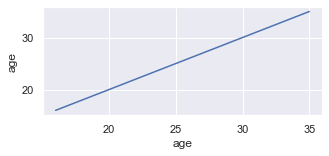

In [246]:
app.mainloop()